In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import csv

import datetime
from datetime import date
import calendar


import numpy as np
from bokeh.io import show
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, RangeTool
from bokeh.plotting import figure
#from bokeh.sampledata.stocks import AAPL
from bokeh.plotting import figure, output_file, show
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, Plot, LinearAxis, Grid
from bokeh.models.glyphs import Line

In [6]:
# numeros totales
# actividad por hora
# promedios por mes o por año

# palabras mas comunes del grupo
# palabras mas comunes por usuario
# palabras mas comunes por dia


# participacion en el grupo - cake

# dia mas activo
# cantidad de mensajes cronologicos por mes

# mas multimediero

In [7]:
#data = pd.read_csv("Whatsapp group chat.txt") 

#filename = 'MyFile.txt' 
fin=open("chat.txt",'r')
fin

<_io.TextIOWrapper name='chat.txt' mode='r' encoding='cp1252'>

In [8]:
with open('chat.txt', 'r', encoding="utf8") as myfile:
  data = myfile.read()
sentences = data.split('\n')  

In [9]:
len(sentences)
#i=228
# date = sentences[i].split('-',1)[0].strip()
# usertext = sentences[i].split('-',1)[1].strip()
# user = usertext.split(':',1)[0].strip()
# text = usertext.split(':',1)[1].strip()

133502

In [10]:
#for i in sentences[i]:
df = pd.DataFrame()
for i in range(1,5000):
    date=None
    usertext=None
    user=None
    text=None
    try:
        date = sentences[i].split('-',1)[0].strip()
        usertext = sentences[i].split('-')[1].strip()
        user = usertext.split(':',1)[0].strip()
        text = usertext.split(':',1)[1].strip()
    except IndexError: 
        pass
    
    
    
    serie = pd.Series([user, date, text], index=['user', 'date', 'text'])
    df = df.append(serie, ignore_index=True)

In [11]:
df = df.dropna(axis=0, how='any') # tira las filas que tienen solo un NA 

In [12]:
#df.date = pd.to_datetime(df.date,format='%d/%m/%y')
df.date = pd.to_datetime(df.date,format='%d/%m/%y %H:%M')
df['week'] = df.date.dt.week
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['weekdaynr'] = df.date.dt.weekday
df['hour'] = df.date.dt.hour
df['date3'] = df.date.dt.date


#calendar.day_name[my_date.weekday()]

In [13]:
df

,date,text,user,week,year,month,weekdaynr,hour,date3
0,2016-03-11 23:08:00,Eey que onda esta banda?,Rama cl,10,2016,3,4,23,2016-03-11
1,2016-03-12 02:33:00,No hay nadie en el peishe cats,Riti Cell,10,2016,3,5,2,2016-03-12
2,2016-03-12 03:20:00,Tengo fiesta con minas y barra libre,Pelado Ale,10,2016,3,5,3,2016-03-12
3,2016-03-12 03:20:00,Alguno está?,Pelado Ale,10,2016,3,5,3,2016-03-12
4,2016-03-12 15:04:00,<Multimedia omitido>,Moda Cl,10,2016,3,5,15,2016-03-12
...,...,...,...,...,...,...,...,...,...
4994,2016-05-03 22:37:00,Clave a se añuren,Sebi Cell,18,2016,5,1,22,2016-05-03
4995,2016-05-03 22:37:00,Apuren. El tiempo corre queridos. Ya ya ya,Sebi Cell,18,2016,5,1,22,2016-05-03
4996,2016-05-03 22:37:00,Ah,Sebi Cell,18,2016,5,1,22,2016-05-03
4997,2016-05-03 22:39:00,Chiqui pere pepepe,Il So,18,2016,5,1,22,2016-05-03


In [14]:
weekDays = ["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"]
#df['weekday'] = weekDays[df['weekday']]

#df['weekday'] = df['weekday'].apply(lambda x: weekDays[df['weekday']])
df['weekday'] = df['weekdaynr'].apply(lambda x: weekDays[x])
df.sample(3)

,date,text,user,week,year,month,weekdaynr,hour,date3,weekday
1780,2016-04-03 16:24:00,Lobito,Oguitoo,13,2016,4,6,16,2016-04-03,Domingo
2739,2016-04-15 17:31:00,Hay que recuperar esas obras,Fede Sharley,15,2016,4,4,17,2016-04-15,Viernes
59,2016-03-13 21:23:00,<Multimedia omitido>,Iña Cell,10,2016,3,6,21,2016-03-13,Domingo


In [15]:
df_graph1 = df.groupby('date3').count()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


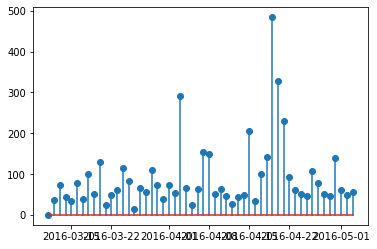

In [16]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


x = df_graph1.index
y = df_graph1.text

plt.stem(x, y)
plt.show()



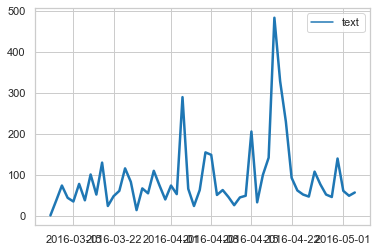

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

x = df_graph1.index
y = df_graph1.text

#values = rs.randn(365, 4).cumsum(axis=0)
dates = df_graph1.index#pd.date_range("1 1 2016", periods=365, freq="D")
data = df_graph1.text#pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
datamean = data.rolling(3).mean()

sns.lineplot(data=[data], palette="tab10", linewidth=2.5)

In [18]:
import numpy as np

# from bokeh.io import show
# from bokeh.layouts import column
# from bokeh.models import ColumnDataSource, RangeTool
# from bokeh.plotting import figure
# from bokeh.sampledata.stocks import AAPL

# dates = np.array(df_graph1.index, dtype=np.datetime64)
# source = ColumnDataSource(data=dict(date=dates, close=df_graph1.text))

# p = figure(plot_height=300, plot_width=800, tools="xpan", toolbar_location=None,
#            x_axis_type="datetime", x_axis_location="above",
#            background_fill_color="#efefef", x_range=(dates[0], len(dates)-1)
    

# p.line(df_graph1.index, df_graph1.text)
# p.yaxis.axis_label = 'Mensajes x día'

#            #p.line(x, y, line_width=2)
           
# select = figure(title="Drag the middle and edges of the selection box to change the range above",
#                 plot_height=130, plot_width=800, y_range=p.y_range,
#                 x_axis_type="datetime", y_axis_type=None,
#                 tools="", toolbar_location=None, background_fill_color="#efefef")

# range_tool = RangeTool(x_range=p.x_range)
# range_tool.overlay.fill_color = "navy"
# range_tool.overlay.fill_alpha = 0.2

# select.line('date', 'close', source=source)
# select.ygrid.grid_line_color = None
# select.add_tools(range_tool)
# select.toolbar.active_multi = range_tool

# show(column(p, select))

 #### graph 2 - actividad por horas por año

In [19]:
years_lists = df.year.unique()
df_graph2 = pd.DataFrame()
#serie_graph2 = pd.Series()

for i in years_lists:
#    graph2 = 
    #graph2 = graph2.append(df.loc[df['year'] == i].groupby('hour').count().text)
    serie_graph2 = df.loc[df['year'] == i].groupby('hour').count().text#.drop(index=i)
    df_graph2 = df_graph2.append(serie_graph2, ignore_index=True).transpose()
    
     
df_graph2.columns = years_lists
df_graph2

,2016
0,87.0
1,78.0
2,41.0
3,11.0
4,7.0
5,2.0
6,12.0
7,75.0
8,84.0
9,187.0


In [ ]:
df2 = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

df2.loc[df2['cyl'] == 4, "cty"]

In [ ]:
# Import Data
df2 = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

plt.figure(figsize=(16,10), dpi= 80)


sns.kdeplot(df2.loc[df2['cyl'] == 4, "cty"], shade=True, color="g", label="Cyl=4", alpha=.7)
#sns.kdeplot(df.loc[df['cyl'] == 5, "cty"], shade=True, color="deeppink", label="Cyl=5", alpha=.7)
#sns.kdeplot(df.loc[df['cyl'] == 6, "cty"], shade=True, color="dodgerblue", label="Cyl=6", alpha=.7)
#sns.kdeplot(df.loc[df['cyl'] == 8, "cty"], shade=True, color="orange", label="Cyl=8", alpha=.7)

# Decoration
plt.title('Density Plot of City Mileage by n_Cylinders', fontsize=22)
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots(len(years_lists), sharey=True)

# apply a frequency to the data
goog = goog.asfreq('hour', method='pad')  

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
#local_max = pd.to_datetime('2007-11-05')
#offset = pd.Timedelta(900, 'D')

for i in years_lists:

ax[i].legend([years_lists[i]], loc=len(years_lists)
#ax[i].get_xticklabels()[len(years_lists)].set(weight='heavy', color='red')
#ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');